# Why Gatsby is not the Mr.right for Daisy: Image and sentiment analysis of four main characters in _The Great Gatsby_ based on their relationship

## Wenyu Li

Instructions: 

1. Replace "yourname" in the title of this notebook, and "your name here" in the markdown above, with your name.
2. Create a title for your final project. Preferably, this should indicate what your argument is. Replace "your title here" in the markdown above with your title.
3. Write your paper, and include everything (your prose in Markdown, your code, and your figures) in this notebook. Don't include the texts you're analyzing. If you generated your corpus programmatically (i.e. using corpus-db.org or some fancy Python), maybe you'll want to include that in the code somewhere here. Your notebook file (`.ipynb`) will be the only thing you turn in.  
3. Annotate your code using markdown cells, and/or comment lines (lines beginning with `#`), explaining why you're doing what you're doing. If one of your functions takes certain parameters, for instance, why did you choose those parameters? 
3. Prune your notebook of unnecessary or redundant code. Run all your code again, to show that it works as-is. Each code cell should have a number in it, and an output, if applicable. 
4. Proofread well! If English is not your first language, you might consider making an appointment with [the Writing Center](https://slc.berkeley.edu/appointment-service) to get help polishing the language of your paper. At minimum, you'll want to use a spell checker and maybe even an automatic grammar-checking service like [Grammerly](https://www.grammarly.com/). (Of course, you now have the tools to analyze your own writing, if you want. You can get your markdown text into Python by adapting the word count function below, and use it to analyze your most frequent n-grams!) You might also consider organizing a mutual editing session with classmates.
4. Ensure that you have no more than three plots (figures). One figure with several subplots is OK, and counts as one figure.
4. If you quote from or reference literary works, or works of criticirm, provide in-text parenthetical citations. Then create a bibliographic entry for each work you cite, and include them at the end. Unless your discipline requires a different format, use [MLA Style](https://style.mla.org/) as the format for your bibliography, and title it "works cited." 
4. Replace the value of the `filename` variable in the wordcount cell below to the name your file. (E.g., `Jonathan-Final.ipynb`.) Then run the wordcount cell. Ensure that your paper is between 1000 and 2000 words, so it doesn't give you any errors or warnings.  
5. Optionally, and for a 5% bonus, add your notebook to the `/Projects` directory of the course repository, and submit it as a pull request. Your project will then become public. 
6. Email me your `.ipynb` file: jonathan.reeve@columbia.edu. Please email me only your `.ipynb` file, alone and uncompressed. Please don't respond to an existing email, but create a new email, with the subject: `Yourname: Final Project`, replacing `yourname` with your name. Do this regardless of whether you also submit a pull request. 
7. Celebrate! You've finished your final project, and gloriously completed _Introduction to Computational Literary Analysis_!

In [1]:
# Import all your libraries here, and only here, please.
import nltk
from nltk import word_tokenize,sent_tokenize,pos_tag
from sklearn.decomposition import PCA
from sklearn.feature_extraction.text import TfidfVectorizer
import pandas as pd
from matplotlib import pyplot as plt
import requests
import json
import numpy as np
from collections import Counter
from nltk.text import Text
import spacy
from nltk.corpus import wordnet as wn
%matplotlib inline
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from more_itertools import chunked
from textblob import TextBlob
#import pyLDAvis.sklearn 

# Don't remove this line. It's necessary for the wordcount function 
# below to work. 
from IPython.nbformat import current

# This is to make your plots a little bigger.
# You may adjust this, but be careful of making your plots too big or too small.
plt.rcParams['figure.figsize'] = [15, 10]

F:\anaconda3\lib\site-packages\IPython\nbformat.py:13: ShimWarning: The `IPython.nbformat` package has been deprecated since IPython 4.0. You should import from nbformat instead.
  "You should import from nbformat instead.", ShimWarning)
F:\anaconda3\lib\site-packages\nbformat\current.py:19: UserWarning: nbformat.current is deprecated.

- use nbformat for read/write/validate public API
- use nbformat.vX directly to composing notebooks of a particular version

  """)


## Introduction

The text computational analysis below was based on Fitzgerald's _The Great Gatsby_. The reason why I chose this book as the material of my final project is the background where the story happened was resembles contemporary Chinese society. _Chinese Dreams_ was mentioned in 2012 while _American Dreams_ was mentioned in 1920s. It's very interesting that I read the book in a modern prospect. Also, the fiction give me some advice towards my attitude to life.

Fitzgerald, the author of _The Great Gatsby_, was inspired by parties he had attended while visiting Long Island's north shore. What my reading of the fiction is that Gatsby is the embodiment of young Fitzgerald who was falling in love for the first time. Ginevra King, the first lover of Fitzgerald, is the prototype of Daisy. Nick, the narrator, is the embodiment of Fitzgerald when writing. Therefore, I think the tragedy of Gatsby which brings out resonate was planned advanced by Fitzgerald himself. The story between him and his first lover is very sad. Young Fitzgerald lost his lover because of the lack of money. Although he became rich and famous by writing when he started writing this book, he still couldn't get his first lover back( she had been married to a rich merchant). It is similiar to plots in this book. Nick, the narrator, was a original character representing Fitzgerald himself. He tells us the story of his young stage which is the very epitome of that period. 

Fitzgerald produced the separation on purpose. Computational analysis is the tool to help us find the way how he produced the tragedy.  

My argugment is to research on the reason why Gatsby and Daisy wouldn't be together from the prospect of image and sentiment. What I did with computational analysis has 2 parts.
* One was from the subjective view of characters themselves, using pos_tag(), Counter(), Sentiment Analysis and Topic Modelling to make personality and relationship analysis of characters, especially Gatsby and Daisy. The first part I analyzed the words every character said. 
* Another was from the objective prospect which means Nick, I used pos_tag(), PCA and Sentiment Analysis to do the same analysis as part one. I sorted out the the sentences containing their names which means the objective description of the four main characters for the second part.

## Hypothesis
* Daisy and Tom share the same features. But she is different from Gatsby. They are not destined to be together.
* Nick doesn't have a strong mind and he is easy to change through the influence of others.

## Corpus
There're only two files in my Corpus including a regular _The Great Gatsby_ and a one tagged with what every character said.

In [2]:
gatsby = open('The-Great-Gatsby',encoding='UTF-8').read()
gatsbyWords = word_tokenize(gatsby.lower())

In [3]:
tagged = open('gatsby-tagged.txt',encoding='UTF-8').read()
taggedTokens=word_tokenize(tagged)
taggedSents = sent_tokenize(tagged)
tag = tagged.split('\n\n')

Splitting the file into parts is essential.

In [4]:
gatsbyParts = gatsby.lower().split("%%%%%")
len(gatsbyParts)

10

In [5]:
gatsbySents = [sent_tokenize(part) for part in gatsbyParts]

In [6]:
sum=0
for part in gatsbySents:
    print(len(part))
    sum=sum+len(part)
print("sum: ",sum)

2
356
318
407
375
343
294
873
273
436
sum:  3677


In [7]:
gatsbyTokens = [word_tokenize(part) for part in gatsbyParts]

I put sentences which are used to describe the four main characters(Gatsby, Daisy, Tom and Nick) in each chapter into a list. Then I used PCA to make analysis with stylometry to prove my hypothesis.

In [8]:
gatSent=[[],[],[],[],[],[],[],[],[],[]]
daisySent=[[],[],[],[],[],[],[],[],[],[]]
tomSent=[[],[],[],[],[],[],[],[],[],[]]
nickSent=[[],[],[],[],[],[],[],[],[],[]]
for i in range(len(gatsbySents)):
    for sent in gatsbySents[i]:
        if 'gatsby' in sent:
            gatSent[i].append(sent)
        if 'daisy' in sent:
            daisySent[i].append(sent)
        if 'tom' in sent:
            tomSent[i].append(sent)
        if 'nick' in sent:
            nickSent[i].append(sent)

In [9]:
fourSent=[gatSent,daisySent,tomSent,nickSent]
for item in fourSent:
    for i in range(10):
        item[i]="".join(item[i])

In [10]:
for i in range(4):
    fourSent[i]="".join(fourSent[i])

I sorted out sentences which every main character said into four list.

In [11]:
Tom = []
Daisy=[]
Nick=[]
Gatsby=[]

for para in tag:
    if para.startswith('/Tom'):
        para = para.replace('"','')
        para = para.replace('/Tom','')
        Tom.append(para)
    if para.startswith('/Daisy'):
        para = para.replace('"','')
        para = para.replace('/Daisy','')
        Daisy.append(para)
    if para.startswith('/Nick'):
        para = para.replace('"','')
        para = para.replace('/Nick','')
        Nick.append(para)
    if para.startswith('/Gatsby'):
        para = para.replace('"','')
        para = para.replace('/Gatsby','')
        Gatsby.append(para)
character=[Tom,Daisy,Nick,Gatsby]

In [12]:
allraw=[]
for i in character:
    i = " ".join(i)
    allraw.append(i)
len(allraw)

4

In [13]:
TomTokensLower = []
DaisyTokensLower=[]
NickTokensLower=[]
GatsbyTokensLower=[]

#for chara in Characs:
 #   for sent in Characs[chara]
for sent in Tom:
    TomTokensLower=TomTokensLower+(word_tokenize(sent.lower()))
for sent in Daisy:
    DaisyTokensLower=DaisyTokensLower+(word_tokenize(sent.lower()))
for sent in Nick:
    NickTokensLower=NickTokensLower+(word_tokenize(sent.lower()))
for sent in Gatsby:
    GatsbyTokensLower=GatsbyTokensLower+(word_tokenize(sent.lower()))
charTokensLower=[TomTokensLower,DaisyTokensLower,NickTokensLower,GatsbyTokensLower]

## Sentiment and relationship analysis of characters

## In subjective view
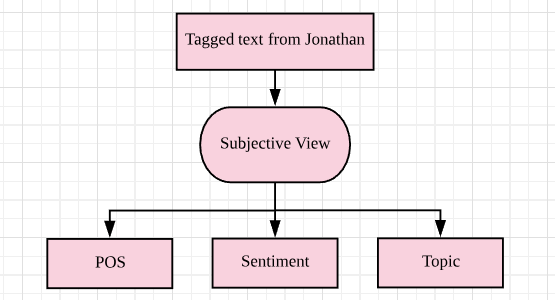

## POS
I found out the most general words and pos of the four main character.

In [14]:
def getPOS(token):
    POS = pos_tag(token)
    words = [pair[0] for pair in POS]
    pos = [pair[1] for pair in POS]
    return Counter(pos).most_common()[10:15], Counter(words).most_common()[:10] # most is noun, then prep or conj, personal pronoun

In [15]:
Gatpos,Gatword=getPOS(GatsbyTokensLower)
Gatpos,Gatword

([('VBP', 117), ('TO', 82), ('VBZ', 76), ('NNS', 60), ('CC', 60)],
 [('.', 241),
  (',', 199),
  ('i', 126),
  ('you', 98),
  ('the', 88),
  ('to', 82),
  ("n't", 64),
  ('a', 58),
  ('it', 56),
  ('of', 48)])

In [16]:
Daisypos,Daisyword=getPOS(DaisyTokensLower)
Daisypos,Daisyword

([('VBD', 59), ('TO', 47), ('NNS', 44), ('VBZ', 43), (':', 43)],
 [(',', 116),
  ('.', 113),
  ('you', 65),
  ('i', 64),
  ('to', 47),
  ('?', 43),
  ("'s", 40),
  ('--', 40),
  ('a', 36),
  ('the', 35)])

In [17]:
Tompos,Tomword=getPOS(TomTokensLower)
Tompos,Tomword

([('VBD', 88), ('VBZ', 78), ('TO', 78), ('MD', 64), ('CC', 61)],
 [('.', 183),
  (',', 148),
  ('i', 102),
  ('you', 102),
  ('to', 78),
  ('the', 66),
  ('a', 63),
  ('?', 59),
  ("'s", 54),
  ("n't", 48)])

In [18]:
Nickpos,Nickword=getPOS(NickTokensLower)
Nickpos,Nickword

([('VBZ', 64), ('VBD', 62), ('MD', 51), ('TO', 47), ('CC', 34)],
 [('.', 143),
  (',', 88),
  ('i', 77),
  ('?', 76),
  ('you', 69),
  ('to', 47),
  ("'s", 40),
  ('the', 34),
  ("n't", 34),
  ('it', 33)])

### Analysis
* Gatsby uses more "n't" while Daisy uses more "--" . Gatsby tends to deny, which shows that there are more negative components to his personality than Daisy's.(Also, this point can be proved in the sentimental analysis in the following graph.) Diasy is hesitant which is the cowardness component of her disposition. 
* Tom and Daisy both like to use "?" more often, which represents they tend to question others. It shows they have a superiority complex towards others. 
* Tom and Daisy both like to use past tense while Gatsby uses present tense more. It shows Tom and Daisy attach great importance to the past. Also, it's interesting because they are "old money" while Gatsby is "new money".
* Nick has things in common with all the other 3 characters, which shows he is influenced by others.

## Sentiment Analysis
I made Sentiment Analysis with every sentence in what they said.

In [19]:
gatSentiments = [TextBlob(sent).sentiment.polarity
                    for sent in Gatsby]
daisySentiments = [TextBlob(sent).sentiment.polarity
                    for sent in Daisy]
tomSentiments = [TextBlob(sent).sentiment.polarity
                    for sent in Tom]
nickSentiments = [TextBlob(sent).sentiment.polarity
                    for sent in Nick]

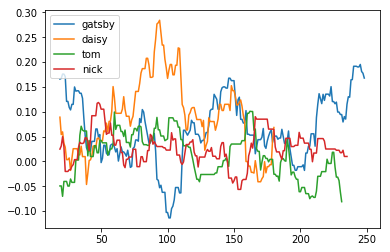

In [20]:
df = pd.DataFrame([gatSentiments, daisySentiments,tomSentiments,nickSentiments], index=['gatsby', 'daisy','tom','nick']).T
df.rolling(window=20).mean().plot()

In [21]:
len(Gatsby)

249

In [22]:
Gatsby[80:100]

['One of the papers said they thought the rain would stop about four. I think\nit was the JOURNAL. Have you got everything you need in the shape of--of tea?',
 "Of course, of course! They're fine!",
 '. . .old sport.',
 "Nobody's coming to tea. It's too late!",
 "I can't wait all day.",
 "We've met before,",
 "I'm sorry about the clock,",
 'Five years next November.',
 'Where are you going?',
 "I've got to speak to you about something before you go.",
 'Oh, God!',
 'This is a terrible mistake,',
 'a terrible, terrible mistake.',
 "She's embarrassed?",
 "Don't talk so loud.",
 'Oh, hello, old sport,',
 'Has it?',
 "What do you think of that? It's stopped raining.",
 'I want you and Daisy to come over to my house,',
 'Absolutely, old sport.']

### Analysis
* In some positions, Gatsby and Daisy have a huge emotional contrast. In Chapter 5, which is near "100-120", Gatsby shows Daisy an extensive collection of English shirts while she begins to cry.
* Nick often has same feeling with others and his feelings are delayed. For instance, in Chapter 4, which is around "80", Gatsby went for a drive with Nick and told him about his story. We can see Nick's sentiment changed with Gatsby's.

## Topic Modeling

In [23]:
def chunk(tokens, size): 
    return list(zip(*[tokens[i::size] for i in range(size)]))

In [24]:
gatChunks=chunk(GatsbyTokensLower,300)
gatChunks = [' '.join(chunk) for chunk in gatChunks]
daisyChunks=chunk(DaisyTokensLower,300)
daisyChunks = [' '.join(chunk) for chunk in daisyChunks]
tomChunks=chunk(TomTokensLower,300)
tomChunks = [' '.join(chunk) for chunk in tomChunks]
nickChunks=chunk(NickTokensLower,300)
nickChunks = [' '.join(chunk) for chunk in nickChunks]

In [25]:
def topicModel(chunks, numTopics=5, numWords=8, maxFeats=None): 
    cv = CountVectorizer(stop_words='english',min_df=0.1, max_df=0.9, max_features=maxFeats)
    counts = cv.fit_transform(chunks)
    wordLabels = cv.get_feature_names()
    lda = LatentDirichletAllocation(n_topics=numTopics, max_iter=10, 
                                    learning_method='online',
                                    learning_offset=50., random_state=0)
    ldaOut=lda.fit_transform(counts)
    topicLabels = []
    for i, topic in enumerate(lda.components_):
        print("Topic {}".format(i))
        topicLabel = " ".join([wordLabels[i] for i in topic.argsort()[:-10 - 1:-1]])
        print(topicLabel)
        topicLabels.append(topicLabel)
    return ldaOut, topicLabels

In [26]:
ldaOut1, topicLabels1 = topicModel(gatChunks)
ldaOut2, topicLabels2 = topicModel(daisyChunks)
ldaOut3, topicLabels3 = topicModel(tomChunks)
ldaOut4, topicLabels4 = topicModel(nickChunks)

topicdf1 = pd.DataFrame(ldaOut1, columns=topicLabels1)
topicdf2 = pd.DataFrame(ldaOut2, columns=topicLabels2)
topicdf3 = pd.DataFrame(ldaOut3, columns=topicLabels3)
topicdf4 = pd.DataFrame(ldaOut4, columns=topicLabels4)

soda1=topicdf1[[topicLabels1[0], topicLabels1[2], topicLabels1[4]]]
soda2=topicdf2[[topicLabels2[0], topicLabels2[2], topicLabels2[4]]]
soda3=topicdf3[[topicLabels3[0], topicLabels3[2], topicLabels3[4]]]
soda4=topicdf4[[topicLabels4[0], topicLabels4[2], topicLabels4[4]]]

F:\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0
good night want thought tell going butleri pardon gatsby seen
Topic 1
sure west certainly buchanan used afternoons seeing thought quad woman
Topic 2
loved ve got did daisy think course oh just going
Topic 3
came montenegro infantry educated family little oxford dead days good
Topic 4
ll right just know ca did mr make thought man


F:\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0
nick know like come think ll let mother absolute rose
Topic 1
father cousins order lawn listen met gatsby jay personal shape
Topic 2
little ought sophisticated home words treat deep drug middle baby
Topic 3
ll tom people ve man look mint know butler biloxi
Topic 4
come em daisy heard think nick ferdie glad ought tom


F:\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0
ll know does want daisy make mr myrtle biloxi ve
Topic 1
daisy did ve know town people god let big like
Topic 2
car ll come nick want like wo look ve just
Topic 3
things ll ve wolfshiem know walter man drug little read
Topic 4
apartment want ll notice mineral meet york glad dogs somebody


F:\anaconda3\lib\site-packages\sklearn\decomposition\online_lda.py:294: DeprecationWarning: n_topics has been renamed to n_components in version 0.19 and will be removed in 0.21
  DeprecationWarning)


Topic 0
ve ll mr come got want happen daisy just miss
Topic 1
does live ought know poor like happen night really driver
Topic 2
mr ll carraway know want say left somebody afternoon address
Topic 3
remember buchanan town afraid ve jordan battalion matter suit careful
Topic 4
girl right ca ll away feel fool night told feeling


### Analysis
Gatsby and Tom have few common interests, one of which is _Daisy_.

## In objective view
I know it is not accurate that making analysis with sentences where their names appear. I will sort sentences which are exactly the deacriptions of them out into a txt. file. Then I think the results will be more convincing.
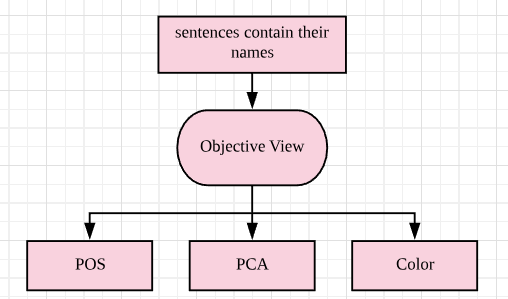

## POS

In [27]:
def getNoun(charSent): 
    adjectives = []
    taggedText=pos_tag(word_tokenize(charSent))
    for pair in taggedText: 
        word = pair[0]
        pos = pair[1]
        if pos in ['NN','NNS','NNP','NNPS']: 
            adjectives.append(word)
    return adjectives

In [28]:
fouradj={}
fouradj['gatadj']=Counter(getNoun(fourSent[0])).most_common()
fouradj['daisyadj']=Counter(getNoun(fourSent[1])).most_common()
fouradj['tomadj']=Counter(getNoun(fourSent[2])).most_common()
fouradj['nickadj']=Counter(getNoun(fourSent[3])).most_common()

In [29]:
for adj in fouradj:
    print(fouradj[adj][:15])
    print('\n')

[('gatsby', 178), ('i', 60), ('house', 21), ('man', 17), ('eyes', 13), ('daisy', 13), ('tom', 12), ('mr.', 10), ('time', 10), ('night', 8), ('face', 8), ('name', 7), ('egg', 7), ('hand', 7), ('look', 7)]


[('daisy', 121), ('i', 31), ('tom', 19), ('house', 13), ('gatsby', 13), ('face', 9), ('voice', 7), ('jordan', 7), ('girl', 5), ('room', 5), ('something', 5), ('eyes', 5), ('night', 5), ('afternoon', 5), ('tomorrow', 4)]


[('tom', 116), ('i', 29), ('daisy', 24), ('buchanan', 16), ('gatsby', 13), ('tomorrow', 12), ('wilson', 11), ('mrs.', 8), ('eyes', 7), ('jordan', 7), ('afternoon', 6), ('man', 6), ('voice', 6), ('people', 6), ('telephone', 5)]


[('nick', 4), ('time', 2), ('everything', 2), ('i', 2), ('sort', 2), ('heart', 2), ('table', 1), ('together.besides', 1), ('talk', 1), ('veranda', 1), ('crept', 1), ('thing', 1), ('me.i', 1), ('letters', 1), ('week', 1)]




### Analysis
* It's very interesting that "house" appears in the output of Gatsby and Daisy, we can see they both concentrate on house which represents the material. 
* The narrator describes Daisy in "TIME" and "DATE".
* Also, we can see Daisy is beautiful. Obviously, Gatsby was always obssesed with her.

## PCA

In [30]:
gatLabel=['gat{}'.format(i) for i in range(10)]
daisyLabel=['daisy{}'.format(i) for i in range(10)]
tomLabel=['tom{}'.format(i) for i in range(10)]
nickLabel=['nick{}'.format(i) for i in range(10)]

In [31]:
chapterLabel=['0','Ⅰ','Ⅱ','Ⅲ','Ⅳ','Ⅴ','Ⅵ','Ⅶ','Ⅷ','Ⅸ']
allLabel=gatLabel+daisyLabel+tomLabel+nickLabel
#len(allLabel)
alltext=gatSent+daisySent+tomSent+gatsbyParts
#len(alltext)

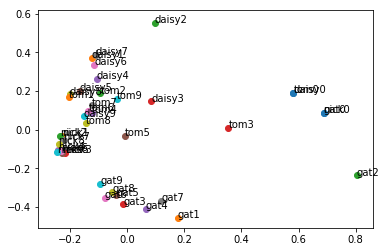

In [32]:
tfidf = TfidfVectorizer(use_idf=False, max_features=1000)
allTf = tfidf.fit_transform(alltext).todense()
pca = PCA(2)
pcaOut = pca.fit_transform(allTf)
xs, ys = pcaOut[:,0], pcaOut[:,1]
for i in range(len(xs)): 
    plt.scatter(xs[i], ys[i])
    plt.annotate(allLabel[i], (xs[i], ys[i]))
plt.rcParams['figure.figsize'] = [10,10]

### Analysis
* Daisy and Tom are really close. Gatsby, however, is not close with them. 
* The curve of Gatsby tends to get close to Daisy, I think it shows 2 points. One is that in Nick's mind, Gatsby is described more like people such as Daisy and Tom as the story goes. The other is Nick is easy to have changes. For instance, in chapter 1,2,7 and 8, Nick is more like Tom and Daisy while in chapter 3,4,5,6 and 9, Nick is more like Gatsby.

## The symbolism of colors (Image Analysis)

Fitzgerald uses many colors in his fictions. I think it's related to the good economy so that people liked mutiple colors at that time, because We all know Fitzgerald was one of the high classes and he appeared in the paries more often. What's more, it's very important to take colors as characters' portraits and qualities. Many colors in the fiction have symbolisms, such as:
* green
* white
* red
* yellow/gold/golden
* blue
* grey

At first, I need to find out the color word.

In [33]:
gatsbyNN = [pair[0] for pair in pos_tag(word_tokenize(gatsby.lower())) 
               if pair[1] in [ 'NN','NNS','NNP','JJ']]
gatsbyNN=set(gatsbyNN)
gatsbyNN

{'help',
 'garrulous',
 'observers',
 'oak',
 'eighteen',
 'fire',
 'hasty',
 'decade',
 'salmon',
 'hands',
 'hopeless',
 'villages',
 'stock',
 'salute',
 'blues',
 'breed',
 'wall-scaling',
 'weary',
 'wheat',
 'meetings',
 'collar',
 'haag',
 'abnormal',
 'fright',
 'excuse',
 'spree',
 'gardens',
 'practicality',
 'towels',
 'drug',
 'salads',
 'away',
 'dutch',
 'stranger',
 'understanding',
 'a.',
 'delicatessen',
 'suggestiveness',
 'clock',
 'darkening',
 'mirror',
 'principal',
 'echolalia',
 'thought',
 'affectations',
 'doors',
 'surplus',
 'yards',
 'curious',
 'stout',
 'cheekbone',
 'suppressions',
 'immediate',
 'suggestion',
 'clear',
 "d'invilliers",
 'resemblance',
 'stairs',
 'drawbridge',
 'doze',
 'unmoved',
 'porch',
 'powerful',
 'mansion',
 'village',
 'whisper',
 'restaurant',
 'brush',
 'tapped',
 'acre',
 'mckee',
 'g.',
 'wolfshiem_',
 'recent',
 'cheap',
 'graceless',
 'sound',
 'fitz-peters',
 'dining-room',
 'babbled',
 'nineteen-seventeen',
 'visitor',


In [34]:
green=[]
white=[]
red=[]
yellow=[]
blue=[]
grey=[]
for part in gatsbySents:
    for sent in part:
        if 'green' in sent or 'grass' in sent or 'summer' in sent or 'young' in sent or 'tea' in sent or 'forest' in sent:
            green.append(sent)
for part in gatsbySents:
    for sent in part:
        if 'white' in sent or 'queit' in sent or 'daisy' in sent or 'cody' in sent:
            white.append(sent)
for part in gatsbySents:
    for sent in part:
        if ' red ' in sent or 'wiolence' in sent or 'blood' in sent or 'selfish' in sent or 'arrogant' in sent in sent:
            red.append(sent)
for part in gatsbySents:
    for sent in part:
        if 'yellow' in sent or 'gold' in sent or 'money' in sent or 'material' in sent or 'wealth' in sent or 'luxur' in sent or 'greed' in sent or 'autumn' in sent or 'death' in sent:
            yellow.append(sent)
for part in gatsbySents:
    for sent in part:
        if 'blue' in sent or 'melancholy' in sent or 'lone' in sent or 'fanci' in sent or 'sad' in sent or 'sorrow' in sent or 'illusion' in sent or 'swim' in sent or 'sea' in sent:
            blue.append(sent)
for part in gatsbySents:
    for sent in part:
        if 'grey' in sent or ' ash' in sent or 'bleak' in sent or 'dust' in sent or 'empty' in sent or 'smoke' in sent or 'gloom' in sent or 'shade' in sent:
            grey.append(sent)

In [35]:
color=[green,white,red,yellow,blue,grey]
for i in range(len(color)):
    color[i]="".join(color[i])

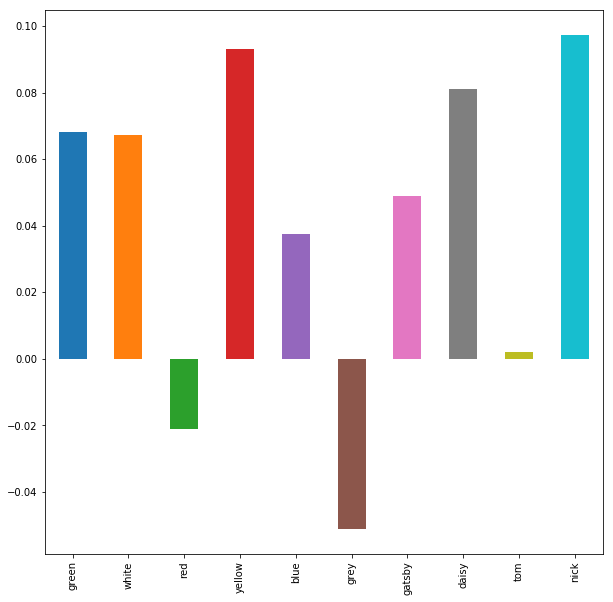

In [36]:
cc=color+fourSent
colorLabel=['green','white','red','yellow','blue','grey']
ccLabel=colorLabel+['gatsby','daisy','tom','nick']
ccBlobs = [TextBlob(text).sentiment
            for text in cc]
ccSentiments = [item.polarity
                 for item in ccBlobs]
pd.Series(ccSentiments, index=ccLabel).plot(kind='bar')

### Analysis
* Obivously, Tom is the most negative among them. He is close to "red".
* Daisy is close to "green" and "yellow". It's interesting because the green light symbolizes her and she loves money.
* Gatsby is close to "blue" and he has some gloomy feelings indeed.

## Conclusion
### Based on the results of subjective analysis above, we can see Daisy and Nick are indeed closer. Daisy has many things in common with Tom in lots of fields, such as the stylometry of the narrator's description and their words. However, she has huge differences with Gatsby. 
### It seems that the overall sentiment of sentences which refers Daisy is closer to Gatsby. The images of Gatsby and Daisy are both positive. Unfortunately, they do not seem to be the same type of person according to the result of stylometry. 

### Image
* Gatsby: Gatsby builts up from nothing and keeps on chasing his dream. He is a sympathetic character while he still has a positive image. Many people come up with he is like _"blue"_ and _"yellow"_. We can see from the chart of image analysis in the objective view he is closer to _"blue"_. Obviously, he prefer Daisy than money and money is only the tool to appeal to her.  
* Daisy: Many essays say Daisy is the character which represents "white". According to the chart below, she is more like "yellow". What can prove is the plot that Daisy is married with Tom and she even doesn't attend Gatsby's funeral. She prefers money far more than love.
* Tom: Tom, as Fitzgerald's rival in love, surely has a very negative image. He is cruel, angry and mean with all bad habits of the high society. He is close to _"red"_ and _"grey"_.
* Nick: Nick as the only friend of Gatsby has changable emotion and see things clearly. Fitzgerald when writing is centainly seeing the whole event and people very clearly. He is still unforgettable so that he has a frequently emotional change.

### Wordcount Function

Please replace `Yourname-Final.ipynb` with the filename of this notebook. For instance, if my name is Jonathan, and I've renamed this notebook to `Jonathan-Final.ipynb`, I'd change `filename = 'Yourname-Final.ipynb'` below to `filename = 'Jonathan-Final.ipynb`. 

In [38]:
filename = 'WenyuLi-FinalWork.ipynb'

if filename == 'Yourname-Final.ipynb': 
    raise ValueError("You forgot to change the filename above!")

with open('WenyuLi-FinalWork.ipynb', encoding='utf-8') as f:
    nb = current.read(f, 'json')

wordCount = 0

for cell in nb.worksheets[0].cells:
    if cell.cell_type == "markdown":
        wordCount += len(cell['source'].replace('#', '').lstrip().split(' '))

# This is the word count of my instructions. 
# My instructions obviously don't count toward the final word count, 
tare = 533

wordCount = wordCount - tare

print("Total words: {}".format(wordCount))

if wordCount < 1000: 
    raise Warning('Your paper has not yet met the minimum required length.')
if wordCount > 2000: 
    raise Warning('Your paper has exceeded the maximum allowed length. Please edit for concision.')

Total words: 1336
